In [1]:
import os
import pandas as pd
import openai
import matplotlib.pyplot as plt

# 함수 정의하기

#### :: gpt_API 함수만들기

In [2]:
def gpt_answer(msg):

    openai.api_key="sdf"
    answer=[]

    completion = openai.ChatCompletion.create(
        model = "gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful assistant."},
                    {"role": "user", "content": msg}]
        )

    for choice in completion.choices:
        print(choice['message']['content'])
        answer.append(choice['message']['content'].strip())

    return answer
    

#### :: reading 함수 만들기

In [3]:
def csv_reading(path):
    df = pd.read_csv(path)
    df = df.drop(['fk_id'], axis = 1)
    return df

#### :: 그래프 만들기

In [4]:
def compare_graph(path):

    # Read the CSV file
    data = pd.read_csv(path)

    # Extract the data for x and y axes from the CSV columns
    x_values = data.iloc[:, 1]  # Assuming x-values are in the first column
    y_values = data.iloc[:, 2]  # Extract y-values from the second column

    # Create the bar graph
    plt.bar(x_values, y_values)

    # Rotate x-axis labels
    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Bar Graph from CSV Data')

    # Display the graph
    plt.show()

# csv 파일 입력 및 결과물 출력

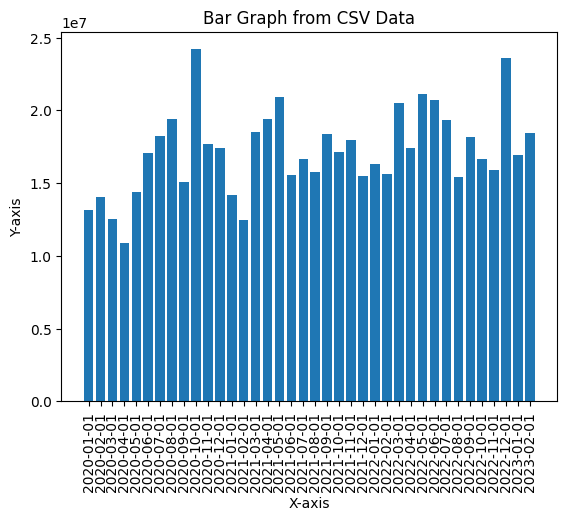

1. 병원의 매출이 2020년 4월부터 6월까지 큰 폭으로 상승했는데, 이 기간 동안 어떠한 변화때문에 이런 상승세가 발생했는지 알고 싶어요.
2. 2020년 10월 1일에 비급여 매출이 대폭 증가했습니다. 이러한 증가세는 어떠한 이유 때문에 발생했을까요?
3. 2021년 3월, 4월, 5월 동안 비급여 매출이 매우 큰 폭으로 증가하는 것으로 보입니다. 이 기간 동안 어떤 변화가 있었거나 마케팅 노력을 강화했는지 알고 싶어요.
4. 2021년 9월 비급여 매출이 큰 폭으로 증가하였는데, 이러한 증가세는 어떤 이유 때문에 발생했을까요?
5. 2022년 3월에 비급여 매출이 이전 달 대비 큰 폭으로 상승했습니다. 이러한 상승세는 어떤 이유 때문에 발생했을까요? 예를 들어, 신규 환자 방문 증가, 치료 방법 개선, 홍보 노력 증가 등이 해당되는지 확인해주세요.


['1. 병원의 매출이 2020년 4월부터 6월까지 큰 폭으로 상승했는데, 이 기간 동안 어떠한 변화때문에 이런 상승세가 발생했는지 알고 싶어요.\n2. 2020년 10월 1일에 비급여 매출이 대폭 증가했습니다. 이러한 증가세는 어떠한 이유 때문에 발생했을까요?\n3. 2021년 3월, 4월, 5월 동안 비급여 매출이 매우 큰 폭으로 증가하는 것으로 보입니다. 이 기간 동안 어떤 변화가 있었거나 마케팅 노력을 강화했는지 알고 싶어요.\n4. 2021년 9월 비급여 매출이 큰 폭으로 증가하였는데, 이러한 증가세는 어떤 이유 때문에 발생했을까요?\n5. 2022년 3월에 비급여 매출이 이전 달 대비 큰 폭으로 상승했습니다. 이러한 상승세는 어떤 이유 때문에 발생했을까요? 예를 들어, 신규 환자 방문 증가, 치료 방법 개선, 홍보 노력 증가 등이 해당되는지 확인해주세요.']

In [6]:
path = '/home/fastcampus/Seoknam/매출 데이터셋/비급여 총매출.csv/든든 한의원 비급여 총매출.csv'
df = csv_reading(path)


prompt = f"다음 주어지는 테이블은 csv 형식의 테이블이야 {df.to_string(index=False)}.  이 테이블에서 'biz_dt'는 날짜를 의미하며, 'nonbenefit_total_pay'는 비급여 총매출을 의미해. 위 테이블 데이터를 종합하여 특이점과 변동하는 값들에 기반하여 이 병원을 위한 피드백 질문 5가지를 생성해줘. 구체적인 날짜를 언급해줘."

compare_graph(path)

raw_qs = gpt_answer(prompt)
raw_qs

In [55]:
# 결과를 저장할 리스트
raw_qs_list = []

# 각 항목에 대해 '\n'을 기준으로 분할
for sentences in raw_qs:
    split_sentences = sentences.split('\n')
    raw_qs_list.extend(split_sentences)

print(raw_qs_list)

['1. 2020년 10월 1일과 2021년 5월 1일 사이 비급여 총매출이 크게 증가한 이유는 무엇인가요?', '2. 2020년 하반기(7월 1일부터 12월 1일)와 2021년 상반기(1월 1일부터 6월 1일) 간 비급여 총매출의 차이가 큰데, 이러한 차이는 어떤 이유 때문인가요?', '3. 2022년 3월 1일을 기점으로 비급여 총매출이 크게 증가한 이유는 무엇인가요?', '4. 2022년 12월 1일과 2023년 2월 1일 사이 비급여 총매출이 크게 증가한 이유는 무엇인가요?', '5. 2020년 4월 1일과 2021년 4월 1일 사이 비급여 총매출이 크게 감소한 이유는 무엇인가요?']
